# Emanuel Staub Araldi

In [2]:
import DSP

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sp

def cos(start, end, w=1):
    n = np.arange(start, end+1, 1)
    return np.cos(w*n), n


def sin(start, end, w=1):
    n = np.arange(start, end+1, 1)
    return np.sin(w*n), n


# fDSP do professor
def impseq(n0, n1, n2):

    #      Generates x(n) = delta(n-n0); n1 <= n <= n2
    #      ----------------------------------------------
    #      [x,n] = impseq(n0,n1,n2)
    #

    n = np.array(range(n1, n2+1))
    # Shift by n0
    x = n-n0
    for i in range(len(x)):
        # Only x[n0] == 0
        if x[i] != 0:
            x[i] = 0
        else:
            x[i] = 1
    # x = (n-n0) == 0
    return [x, n]


def stepseq(n0, n1, n2):
    #     Generates x(n) = u(n-n0); n1 <= n <= n2
    #     ------------------------------------------
    #     [x,n] = stepseq(n0,n1,n2)
    #
    n = np.arange(n1, n2+1)
    x = n-n0
    for i in range(len(x)):
        if x[i] < 0:
            x[i] = 0
        else:
            x[i] = 1
    # x = [(n-n0) >= 0]
    return [x, n]


def  sigadd(x1,n1,x2,n2):
    # % implements y(n) = x1(n)+x2(n)
    # % -----------------------------
    # % [y,n] = sigadd(x1,n1,x2,n2)
    # % y = sum sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # % x2 = second sequence over n2 (n2 can be different from n1)
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1+y2;
    return [y,n]


def sigmult(x1, n1, x2, n2):
    # % implements y(n) = x1(n)*x2(n)
    # % -----------------------------
    # % [y,n] = sigmult(x1,n1,x2,n2)
    # % y = product sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # %
    n = np.arange(min(n1.min(0), n2.min(0)), max(
        n1.max(0), n2.max(0))+1)  # duration of y(n)
    y1 = np.zeros((1, len(n)))  # initialization
    y1 = y1[0, :]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n >= n1.min(0)),
                  (n <= n1.max(0))) == 1)] = x1.copy()
    y2[np.nonzero(np.logical_and((n >= n2.min(0)),
                  (n <= n2.max(0))) == 1)] = x2.copy()
    y = y1*y2
    return [y, n]


def sigshift(x, m, k):
    # % implements y(n) = x(n-k)
    # % -------------------------
    # % [y,n] = sigshift(x,m,k)
    # %
    n = m+k
    y = x.copy()
    return [y, n]


def sigfold(x, n):
    # % implements y(n) = x(-n)
    # % -----------------------
    # % [y,n] = sigfold(x,n)
    # %
    y = np.flip(x)
    n = -np.flip(n)
    return [y, n]


def conv_m(x, nx, h, nh):
    # Modified convolution routine for signal processing
    # --------------------------------------------------
    # [y,ny] = conv_m(x,nx,h,nh)
    # [y,ny] = convolution result
    # [x,nx] = first signal
    # [h,nh] = second signal
    #
    nyb = nx[0]+nh[0]
    nye = nx[len(x)-1] + nh[len(h)-1]
    ny = np.arange(nyb, nye+1)
    y = np.convolve(x, h)
    return [y, ny]

def plot(signal, title="Signal", xl='n', yl='y[n]'):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Titles and labels
    ax.set_title(title)
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    # Plot
    plt.stem(signal[1], signal[0])

def plot_cont(signal, title="Signal", xl='x', yl='y(x)'):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Titles and labels
    ax.set_title(title)
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    # Plot
    plt.plot(signal[1], signal[0])

In [14]:
# Questão 1
## Verificar invarialbilidade no tempo para 𝑦[𝑛]
# 𝑦[𝑛] = 𝑥^2[𝑛 + 1]
##
n = np.arange(-100, 100)
## Copiado do exemplo 1B do professor
x = np.sqrt(10)*np.random.randn(len(n)) # Tomando valores aleatórios para a entrada
y = np.zeros(len(n))
ys = y.copy() # y shifted
###
delay = 1
[x, nx] = sigshift(x, n, -1)
x2 = np.multiply(x, x)
[y, ny] = sigadd(x2, nx, y, n)      # y[n] = x^2[n + 1]
[y1,ny1] = sigshift(y,ny,delay)     # y1 = y[n-delay]
########
[x1,nx1] = sigshift(x,nx,delay)     # x1 = x[n-1-delay]
xs2 = np.multiply(x1, x1)           # xs2 = x1^2 = x^2[n-1-delay]
[y2, ny2] = sigadd(xs2, nx, ys, n)  # y2 = xs2

[diff,ndiff]=sigadd(y1,ny1,-y2,ny2)
vdiff=sum(abs(diff))

if vdiff < 1e-5:
    print(' **** Sistema é Invariante no Tempo ***')
else:
    print(' **** Sistema não é Invariante no Tempo ***')

 **** Sistema não é Invariante no Tempo ***


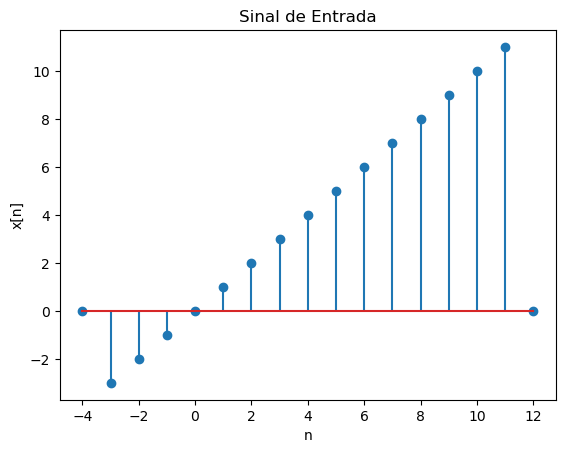

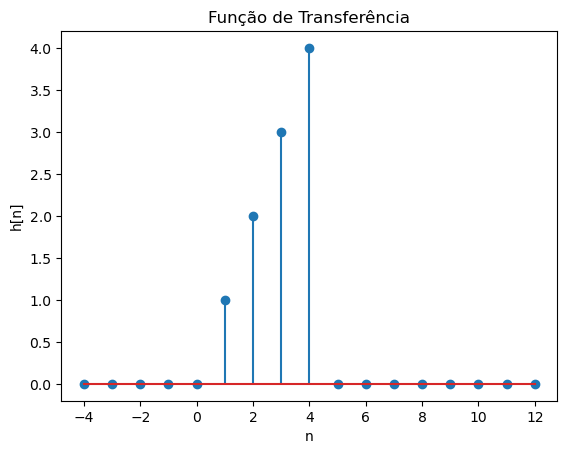

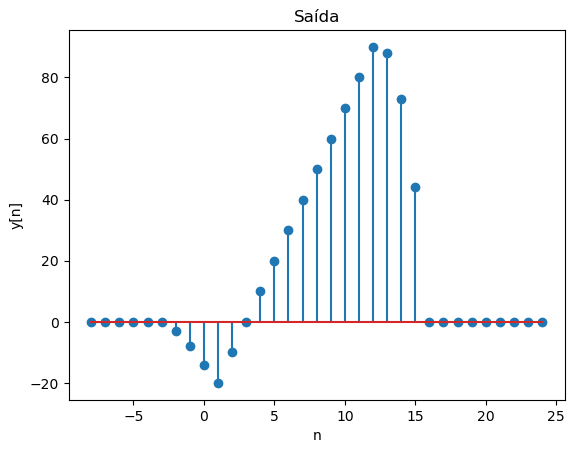

In [15]:
# Questão 2
##
# 𝑥[𝑛] = 𝑛(𝑢[𝑛 + 3] − 𝑢[𝑛 − 12])
# ℎ[𝑛] = 𝑛(𝑢[𝑛] − 𝑢[𝑛 − 5])
##
n = np.arange(-4, 12 + 1)
x = n*(np.heaviside(n+3, 1) - (np.heaviside(n-12, 1)))
h = n*(np.heaviside(n, 1) - (np.heaviside(n-5, 1)))
### Convolução
[y, ny] = conv_m(x, n, h, n)
### Plots
plot([x, n], "Sinal de Entrada", yl='x[n]')
plot([h, n], "Função de Transferência", yl='h[n]')
plot([y, ny], "Saída")

[ True False False False  True False False False  True False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


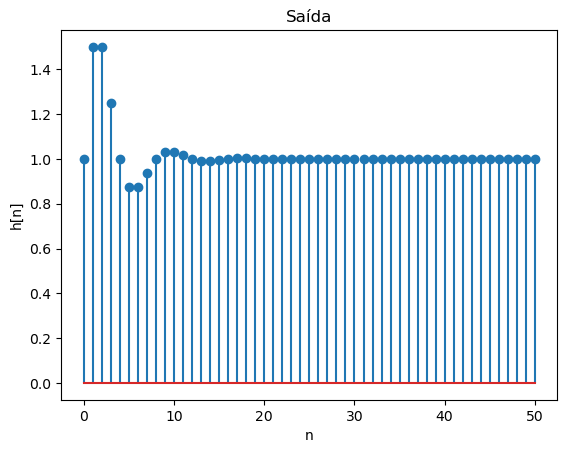

In [10]:
# Questão 3
###########
# 𝑦[𝑛] = 𝑦[𝑛 − 1] − 0.5𝑦[𝑛 − 2] + 𝑥[𝑛] − 0.5𝑥[𝑛 − 1]
# 𝑦[𝑛] - 𝑦[𝑛 − 1] + 0.5𝑦[𝑛 − 2] = 𝑥[𝑛] − 0.5𝑥[𝑛 − 1]
###########
n = np.arange(0, 50+1)
x = np.heaviside(n, 1)
## Calcula y
a = [1, -1, 0.5]
b = [1, -0.5]
y = sp.lfilter(b, a, x)
## Plota
plot([y, n], "Saída", yl='h[n]')
## Estima Regime permanente
yss = y[-1] # Valor de y em regime permanente
print(abs((y-yss)/yss) < 0.02) # Permanente desde n=12

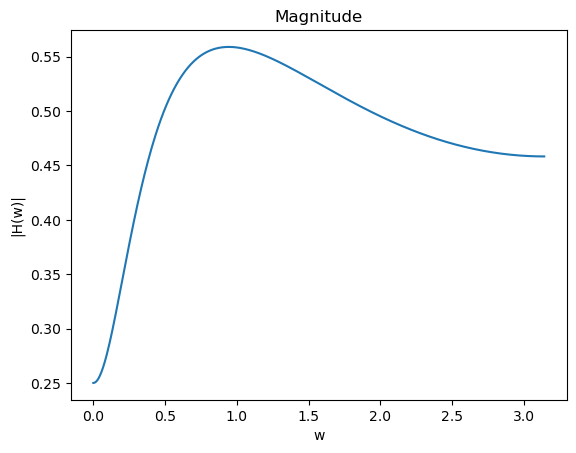

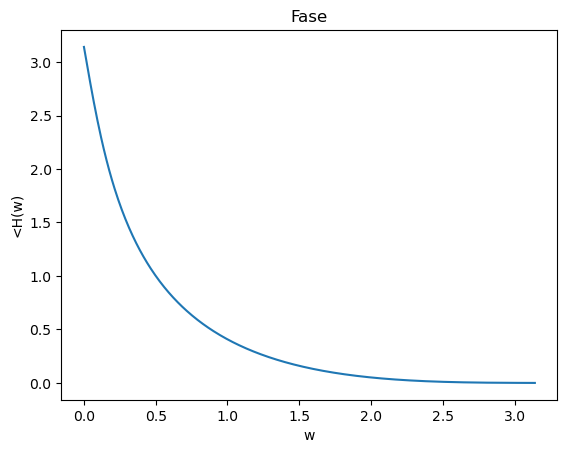

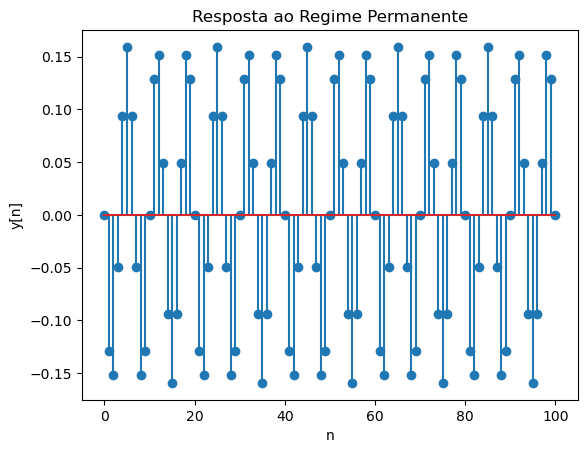

In [46]:
# Questão 4
#####
# ℎ[𝑛] = {0.2𝑛 + (−0.6)𝑛+1}𝑢[𝑛]
#####
n = np.arange(0, 101)
h = (0.2**n + (-0.6**(n+1)) )*np.heaviside(n, 1)
x = np.cos(0.3*np.pi*n + np.pi/2) #=> -sin(0.3pi)
##### DTFTs
k = np.arange(0,501)
w = (np.pi/500)*k
j = complex(0, 1)
## H
H = ([h] @ ((np.exp(-1j*np.pi/500)) ** (np.transpose([n])@[k])))[0]
plot_cont([np.abs(H), w], "Magnitude", xl='w', yl='|H(w)|')
plot_cont([np.angle(H), w], "Fase", xl='w', yl='<H(w)')
## X
X = ([x] @ ((np.exp(-1j*np.pi/500)) ** (np.transpose([n])@[k])))[0]
## Y
Y = X*H
##### IDTF
## y
y = np.zeros(len(n))
i = 0

for N in n:
    # np.real prevents cast warning
    y[i] += np.real(np.trapz(Y*np.exp(j*w*N), w))
    i += 1

y = x/(2*np.pi)
plot([y, n], "Resposta ao Regime Permanente") # => Podemos observar as simetrias do regime permanente desde n=0
# y[n] parece ser ~ -0.16sin(wn)